# Granger Causality Comparison Covid and Portfolios

Table of context:
- [China](#chinag)
- [USA](#usag)
- [Japan](#japang)
- [Switzerland](#swissg)
- [USA with rolling window](#usag_roll)
- [China influence to other countries](#chinax)


In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipynb 
import os.path
import statsmodels.api as sm
from importlib import reload 

# other libraries here
import requests
import arrow

In [140]:
import granger_causality_functions
reload(granger_causality_functions)
from granger_causality_functions import scale_data, plot_time_series, plot_correlation_matrix, make_stationary
from granger_causality_functions import grangers_causality_matrix, network_granger, granger_causality

In [141]:
import stock_analysis_functions
reload(stock_analysis_functions)
from stock_analysis_functions import fill_nan

In [142]:
countries_of_interest = ["USA", "CHE", "JPN", "CHN"]

In [143]:
start_date = "2020-01-1"
end_date = "2020-12-01" # yesterday
dfs = {} # dfs of cumulative confirmed cases
for country in countries_of_interest:
    df = pd.read_csv(f"datasets/{country}_covid.csv")
    dfs[country] = df

# China  <a class="anchor" id="chinag"></a>

In [144]:
country = 'China'
country_code = 'CHN'

In [145]:
df = pd.read_csv(f"datasets/{country_code}_covid.csv")
df = df[['date','new_confirmed']]
df['date'] = [x[:10] for x in df['date']] # delete time
df = df.set_index('date')
df_china = df
df.head()

,new_confirmed
date,
2020-01-22,0.0
2020-01-23,95.0
2020-01-24,277.0
2020-01-25,486.0
2020-01-26,669.0


In [146]:
df_port = pd.read_csv(f"datasets/{country}_portfolio.csv")
df_port = df_port.set_index('Date')
df_port.head()

,EW,VW
Date,,
2020-01-07,0.772575,1.222148
2020-01-08,-0.519914,-0.223421
2020-01-09,1.819714,2.281297
2020-01-10,-0.042838,0.113601
2020-01-13,1.157450,0.610604


In [147]:
# merge datasets
df_total = df_port.merge(df , left_index=True, right_index=True)
df_total.head()

,EW,VW,new_confirmed
2020-01-22,0.624012,0.133715,0.0
2020-01-23,-2.428980,-2.354208,95.0
2020-01-24,-1.204449,-1.954879,277.0
2020-01-27,-3.995359,-3.922354,802.0
2020-01-28,1.268705,1.897464,2632.0


In [160]:
# scale data:
df_scaled = scale_data(df_total, df_total.columns, False)
df_scaled = df_scaled.rename(columns={'new_confirmed': 'New Cases'})
df_scaled.head()

,EW,VW,New Cases
2020-01-22,0.080562,0.019040,0.000000
2020-01-23,-0.313590,-0.335218,0.006276
2020-01-24,-0.155499,-0.278357,0.018301
2020-01-27,-0.515815,-0.558508,0.052986
2020-01-28,0.163794,0.270182,0.173890


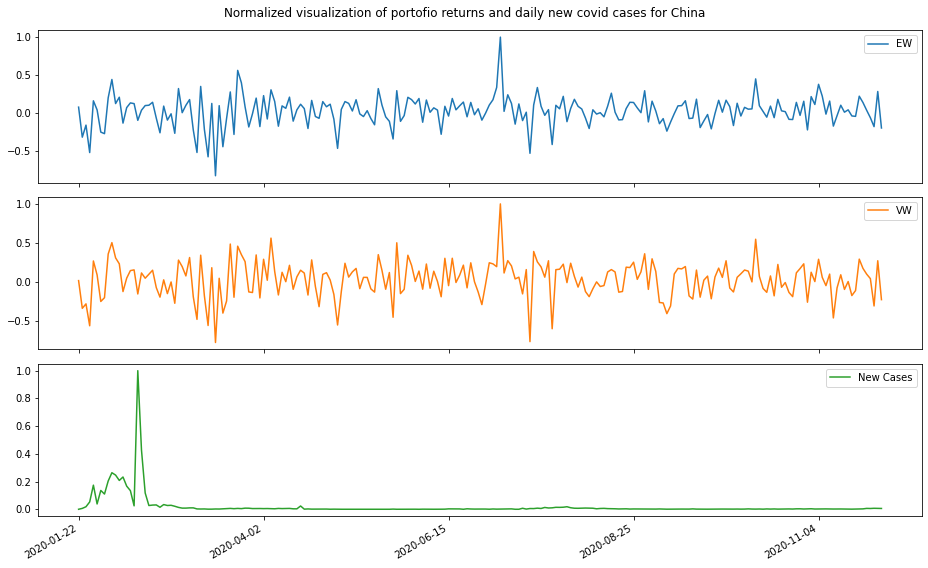

In [161]:
title_plot = 'Normalized visualization of portofio returns and daily new covid cases for ' + country
plot_time_series(df_scaled, title_plot, country + '_portolios_covid')

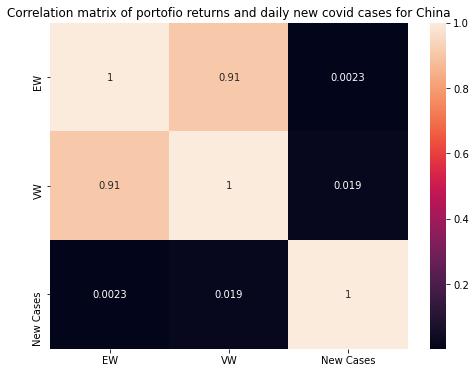

In [162]:
title_plot = 'Correlation matrix of portofio returns and daily new covid cases for ' + country
plot_correlation_matrix(df_scaled, df_scaled.columns, title_plot, country + '_portolios_covid')

STATIONARY TEST: 

 Dickey-Fuller Stationary Test for "EW" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -7.8347
 No. Lags Chosen      = 3
 Critical value 1%     = -3.461
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "VW" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -8.1542
 No. Lags Chosen      = 3
 Critical value 1%     = -3.461
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "New Cases" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -2.7999
 No. Lags Chosen      = 6
 C

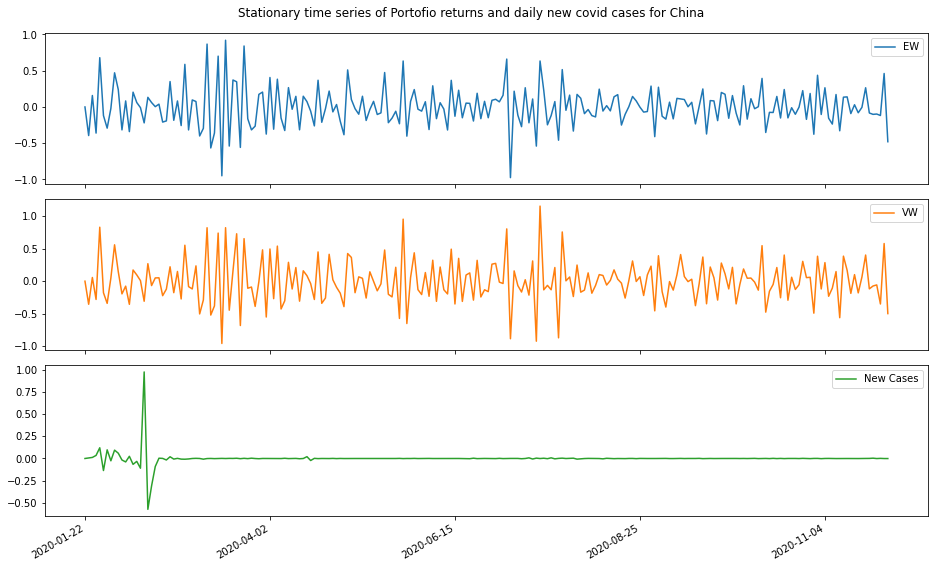


GRANGER CAUSALITY MATRIX: 



,EW_x,VW_x,New Cases_x
EW_y,0.0,0.328,0.355
VW_y,0.332,0.0,0.552
New Cases_y,0.0,0.0,0.0


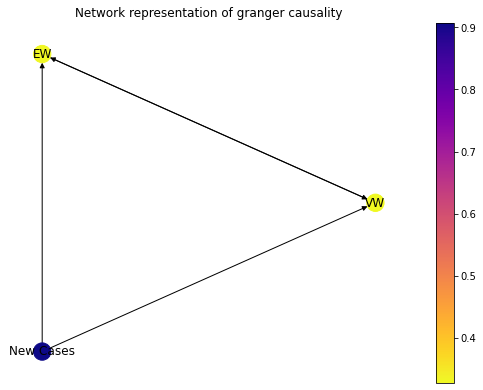

In [163]:
title_plot = 'Portofio returns and daily new covid cases for ' + country
granger_matrix = granger_causality(df_scaled, df_scaled.columns, title_plot, country + '_portolios_covid')

With rolling:

# USA  <a class="anchor" id="usag"></a>

In [90]:
country = 'USA'
country_code = 'USA'

In [91]:
df = pd.read_csv(f"datasets/{country_code}_covid.csv")
df = df[['date','new_confirmed']]
df['date'] = [x[:10] for x in df['date']] # delete time
df = df.set_index('date')
df.head()

,new_confirmed
date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,1.0
2020-01-25,0.0
2020-01-26,3.0


In [92]:
df_port = pd.read_csv(f"datasets/{country}_portfolio.csv")
df_port = df_port.set_index('Date')
df_port.head()

,EW,VW
Date,,
2020-01-07,-0.173111,-0.393110
2020-01-08,0.555981,0.584548
2020-01-09,0.517048,0.547397
2020-01-10,-0.306339,-0.431731
2020-01-13,1.024530,0.973168


In [93]:
# merge datasets
df_total = df_port.merge(df , left_index=True, right_index=True)
df_total.head()

,EW,VW,new_confirmed
2020-01-22,0.170175,-0.311989,0.0
2020-01-23,-0.047698,0.821501,0.0
2020-01-24,-0.732681,-0.761180,1.0
2020-01-27,-1.639182,-1.949440,0.0
2020-01-28,1.112150,1.149336,0.0


In [94]:
# scale data:
df_scaled = scale_data(df_total, df_total.columns, False)
df_scaled = df_scaled.rename(columns={'new_confirmed': 'New Cases'})
df_scaled.head()

,EW,VW,New Cases
2020-01-22,0.018079,-0.037285,0.000000
2020-01-23,-0.005067,0.098176,0.000000
2020-01-24,-0.077840,-0.090967,0.000005
2020-01-27,-0.174146,-0.232974,0.000000
2020-01-28,0.118154,0.137355,0.000000


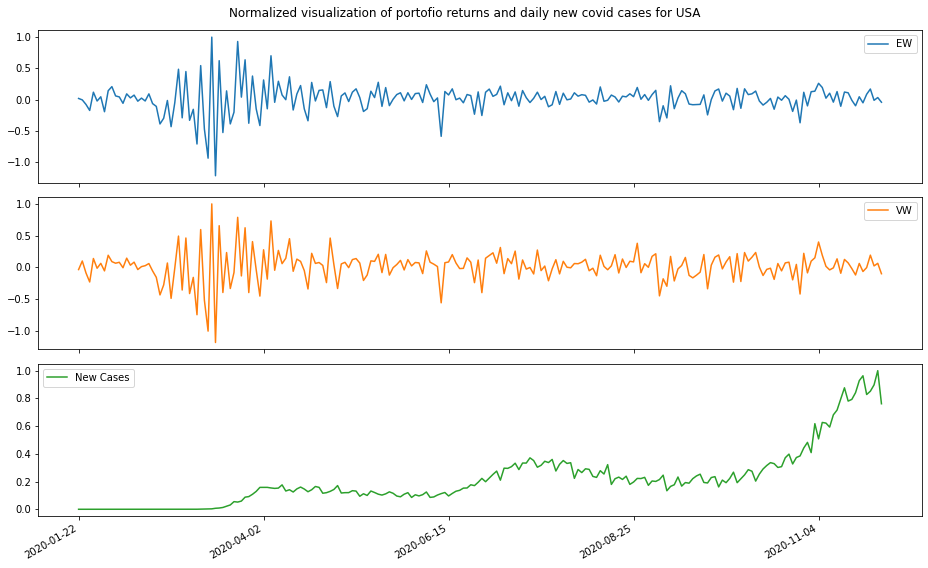

In [95]:
title_plot = 'Normalized visualization of portofio returns and daily new covid cases for ' + country
plot_time_series(df_scaled, title_plot, country + '_portolios_covid')

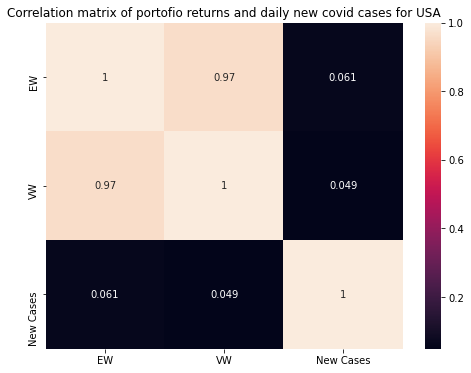

In [96]:
title_plot = 'Correlation matrix of portofio returns and daily new covid cases for ' + country
plot_correlation_matrix(df_scaled, df_scaled.columns, title_plot, country + '_portolios_covid')

STATIONARY TEST: 

 Dickey-Fuller Stationary Test for "EW" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -3.9872
 No. Lags Chosen      = 8
 Critical value 1%     = -3.462
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0015. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "VW" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -4.1614
 No. Lags Chosen      = 8
 Critical value 1%     = -3.462
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0008. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "New Cases" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -1.6599
 No. Lags Chosen      

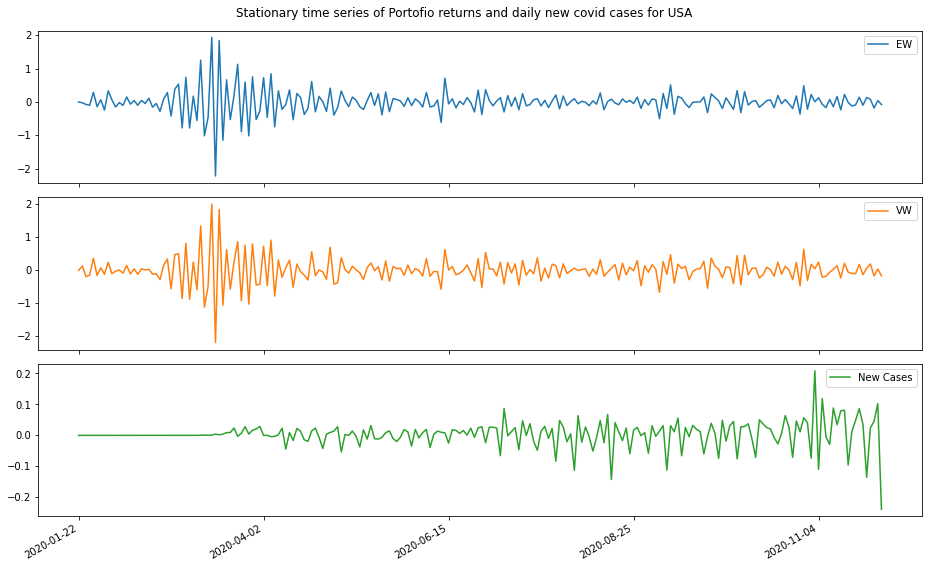


GRANGER CAUSALITY MATRIX: 



,EW_x,VW_x,New Cases_x
EW_y,0.0,0.0,0.713
VW_y,0.0,0.0,0.792
New Cases_y,0.496,0.421,0.0


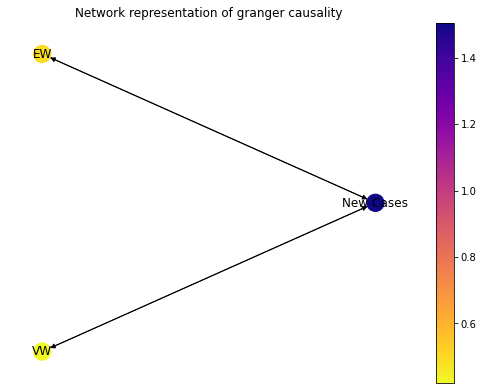

In [97]:
title_plot = 'Portofio returns and daily new covid cases for ' + country
granger_matrix = granger_causality(df_scaled, df_scaled.columns, title_plot, country + '_portolios_covid' + '_portolios_covid')

# Japan  <a class="anchor" id="japang"></a>

In [98]:
country = 'Japan'
country_code = 'JPN'

In [99]:
df = pd.read_csv(f"datasets/{country_code}_covid.csv")
df = df[['date','new_confirmed']]
df['date'] = [x[:10] for x in df['date']] # delete time
df = df.set_index('date')
df.head()

,new_confirmed
date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,2.0


In [100]:
df_port = pd.read_csv(f"datasets/{country}_portfolio.csv")
df_port = df_port.set_index('Date')
df_port.head()

,EW,VW
Date,,
2020-01-06,0.225091,0.480917
2020-01-07,0.195871,0.534318
2020-01-08,0.130477,-0.166757
2020-01-09,0.287765,0.375814
2020-01-10,-0.316420,-0.421251


In [101]:
# merge datasets
df_total = df_port.merge(df , left_index=True, right_index=True)
df_total.head()

,EW,VW,new_confirmed
2020-01-22,0.076674,-0.271578,0.0
2020-01-23,-0.178793,-0.171632,0.0
2020-01-24,-0.402088,-0.599649,0.0
2020-01-27,-0.699733,-0.638943,0.0
2020-01-28,0.434832,0.628786,3.0


In [102]:
# scale data:
df_scaled = scale_data(df_total, df_total.columns, False)
df_scaled = df_scaled.rename(columns={'new_confirmed': 'New Cases'})
df_scaled.head()

,EW,VW,New Cases
2020-01-22,0.011777,-0.037108,0.000000
2020-01-23,-0.027463,-0.023452,0.000000
2020-01-24,-0.061761,-0.081936,0.000000
2020-01-27,-0.107480,-0.087305,0.000000
2020-01-28,0.066791,0.085917,0.001175


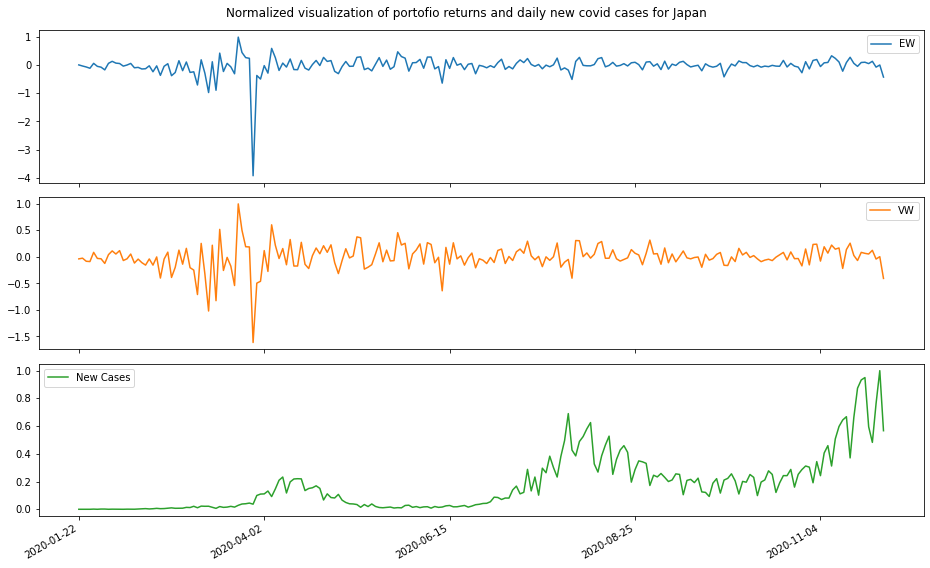

In [103]:
title_plot = 'Normalized visualization of portofio returns and daily new covid cases for ' + country
plot_time_series(df_scaled, title_plot, country + '_portolios_covid')

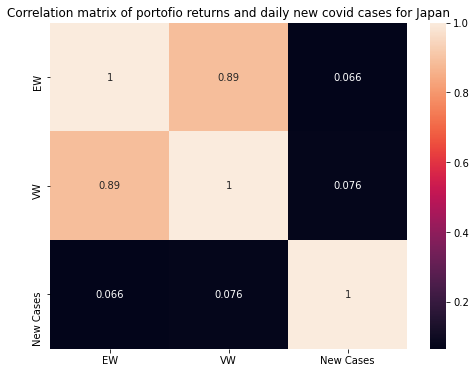

In [104]:
title_plot = 'Correlation matrix of portofio returns and daily new covid cases for ' + country
plot_correlation_matrix(df_scaled, df_scaled.columns, title_plot, country + '_portolios_covid')

STATIONARY TEST: 

 Dickey-Fuller Stationary Test for "EW" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -8.4834
 No. Lags Chosen      = 3
 Critical value 1%     = -3.461
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "VW" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -6.5921
 No. Lags Chosen      = 4
 Critical value 1%     = -3.461
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "New Cases" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -2.4385
 No. Lags Chosen      = 7
 C

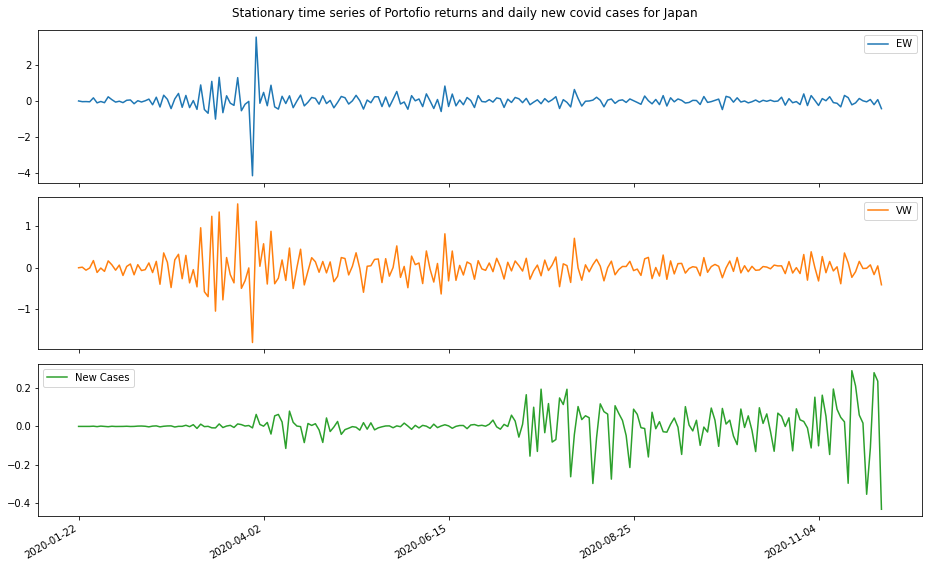


GRANGER CAUSALITY MATRIX: 



,EW_x,VW_x,New Cases_x
EW_y,0.0,0.0,0.336
VW_y,0.0,0.0,0.105
New Cases_y,0.529,0.541,0.0


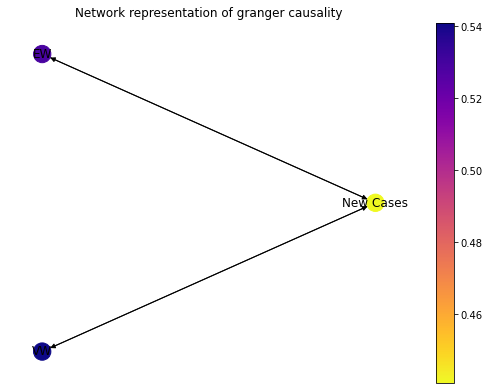

In [105]:
title_plot = 'Portofio returns and daily new covid cases for ' + country
granger_matrix = granger_causality(df_scaled, df_scaled.columns, title_plot, country + '_portolios_covid')

# Switzerland  <a class="anchor" id="swissg"></a>

In [106]:
country = 'Switzerland'
country_code = 'CHE'

In [107]:
df = pd.read_csv(f"datasets/{country_code}_covid.csv")
df = df[['date','new_confirmed']]
df['date'] = [x[:10] for x in df['date']] # delete time
df = df.set_index('date')
df.head()

,new_confirmed
date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0


In [108]:
df_port = pd.read_csv(f"datasets/{country}_portfolio.csv")
df_port = df_port.set_index('Date')
df_port.head()

,EW,VW
Date,,
2020-01-06,0.021097,0.045593
2020-01-07,0.666565,0.347584
2020-01-08,-0.060602,0.108184
2020-01-09,-0.129355,0.008797
2020-01-10,-0.201654,-0.224741


In [109]:
# merge datasets
df_total = df_port.merge(df , left_index=True, right_index=True)
df_total.head()

,EW,VW,new_confirmed
2020-01-22,0.052740,0.211150,0.0
2020-01-23,-0.619322,-0.875241,0.0
2020-01-24,0.308926,0.506619,0.0
2020-01-27,-1.820848,-1.465504,0.0
2020-01-28,0.656589,0.956997,0.0


In [110]:
# scale data:
df_scaled = scale_data(df_total, df_total.columns, False)
df_scaled = df_scaled.fillna(0)
df_scaled = df_scaled.rename(columns={'new_confirmed': 'New Cases'})
df_scaled.head()

,EW,VW,New Cases
2020-01-22,0.002968,0.025176,0.0
2020-01-23,-0.034848,-0.104356,0.0
2020-01-24,0.017382,0.060405,0.0
2020-01-27,-0.102454,-0.174734,0.0
2020-01-28,0.036945,0.114104,0.0


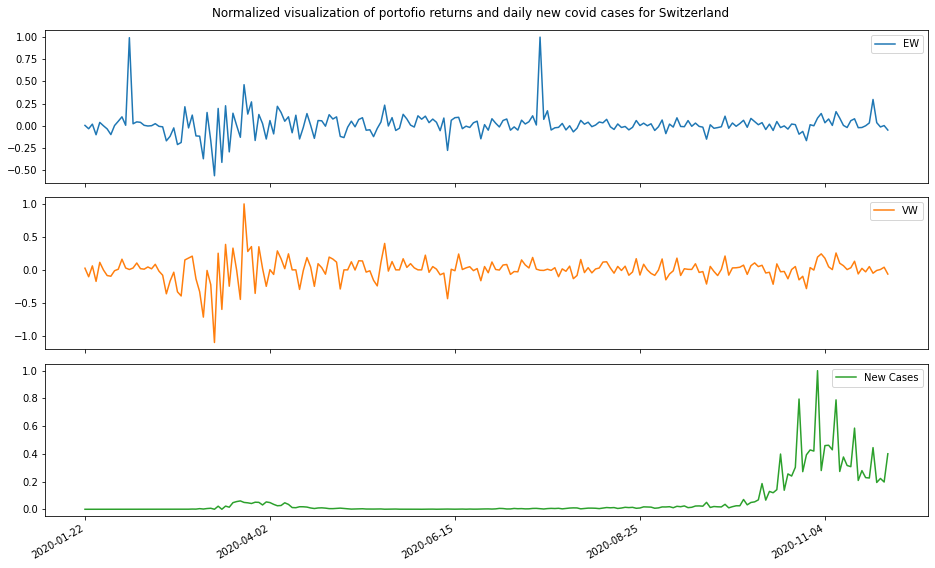

In [111]:
title_plot = 'Normalized visualization of portofio returns and daily new covid cases for ' + country
plot_time_series(df_scaled, title_plot, country + '_portolios_covid')

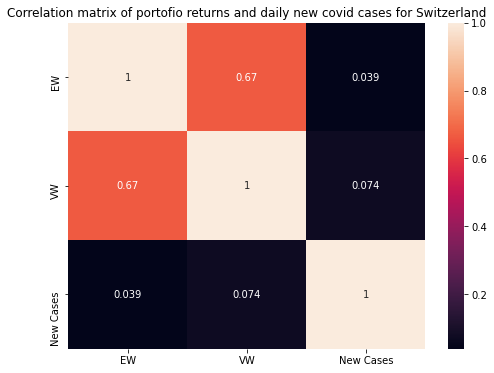

In [112]:
title_plot = 'Correlation matrix of portofio returns and daily new covid cases for ' + country
plot_correlation_matrix(df_scaled, df_scaled.columns, title_plot, country + '_portolios_covid')

STATIONARY TEST: 

 Dickey-Fuller Stationary Test for "EW" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -8.5661
 No. Lags Chosen      = 1
 Critical value 1%     = -3.461
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "VW" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -5.3818
 No. Lags Chosen      = 7
 Critical value 1%     = -3.462
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "New Cases" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = 2.0415
 No. Lags Chosen      = 14
 C

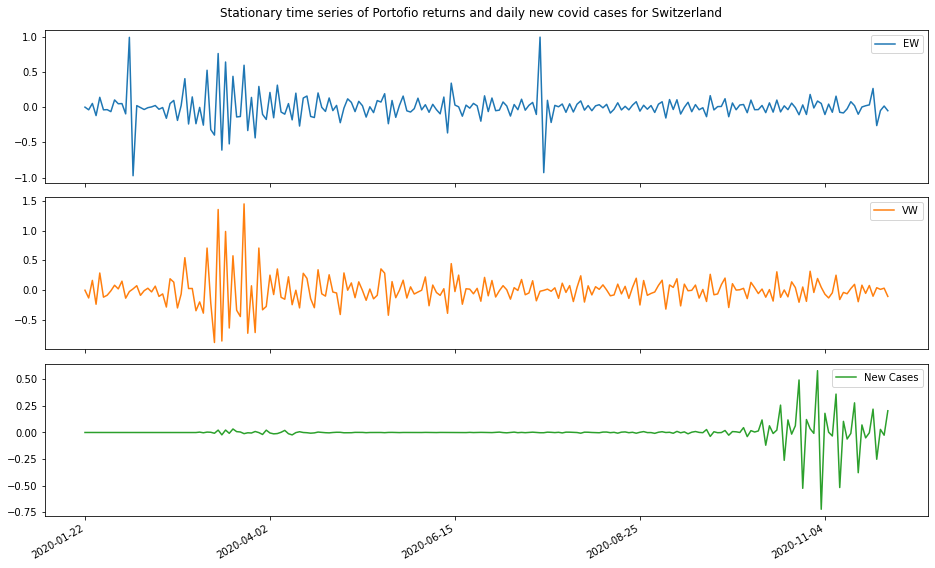


GRANGER CAUSALITY MATRIX: 



,EW_x,VW_x,New Cases_x
EW_y,0.0,0.0,0.393
VW_y,0.235,0.0,0.628
New Cases_y,0.76,0.254,0.0


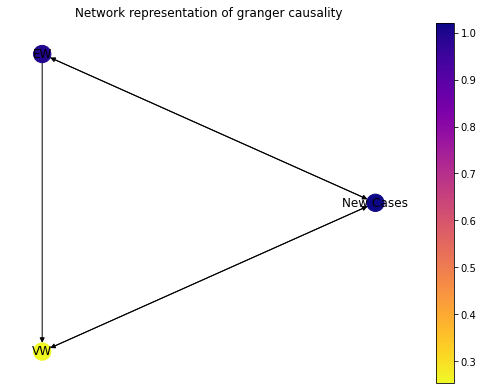

In [113]:
title_plot = 'Portofio returns and daily new covid cases for ' + country
granger_matrix = granger_causality(df_scaled, df_scaled.columns, title_plot, country + '_portolios_covid')

# USA rolling stocks  <a class="anchor" id="usag_roll"></a>

In [177]:
country = 'USA'
country_code = 'USA'

In [178]:
df = pd.read_csv(f"datasets/{country_code}_covid.csv")
df = df[['date','new_confirmed']]
df['date'] = [x[:10] for x in df['date']] # delete time
df = df.set_index('date')
df.head()

,new_confirmed
date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,1.0
2020-01-25,0.0
2020-01-26,3.0


In [179]:
df_port = pd.read_csv(f"datasets/{country}_portfolio.csv")
df_port = df_port.set_index('Date')
df_port = df_port.rolling(10).mean()
df_port = df_port.iloc[10:]
df_port.head()

,EW,VW
Date,,
2020-01-22,0.317185,0.255486
2020-01-23,0.256817,0.279181
2020-01-24,0.131844,0.148323
2020-01-27,-0.001440,-0.003448
2020-01-28,0.007322,0.014169


In [180]:
# merge datasets
df_total = df_port.merge(df , left_index=True, right_index=True)
df_total.head()

,EW,VW,new_confirmed
2020-01-22,0.317185,0.255486,0.0
2020-01-23,0.256817,0.279181,0.0
2020-01-24,0.131844,0.148323,1.0
2020-01-27,-0.001440,-0.003448,0.0
2020-01-28,0.007322,0.014169,0.0


In [181]:
# scale data:
df_scaled = scale_data(df_total, df_total.columns, False)
df_scaled = df_scaled.rename(columns={'new_confirmed': 'New Cases'})
df_scaled.head()

,EW,VW,New Cases
2020-01-22,0.176561,0.174814,0.000000
2020-01-23,0.142957,0.191027,0.000000
2020-01-24,0.073391,0.101489,0.000005
2020-01-27,-0.000802,-0.002359,0.000000
2020-01-28,0.004076,0.009695,0.000000


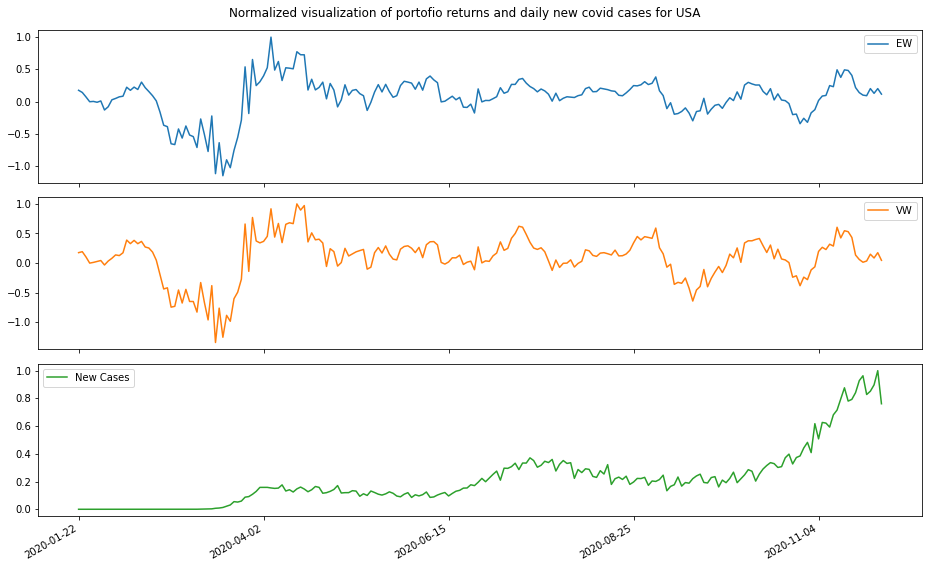

In [182]:
title_plot = 'Normalized visualization of portofio returns and daily new covid cases for ' + country
plot_time_series(df_scaled, title_plot, country + '_portolios_covid')

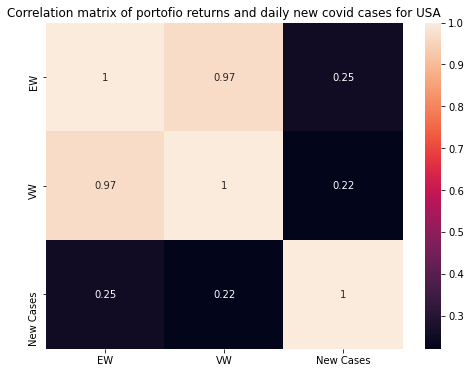

In [183]:
title_plot = 'Correlation matrix of portofio returns and daily new covid cases for ' + country
plot_correlation_matrix(df_scaled, df_scaled.columns, title_plot, country + '_portolios_covid')

STATIONARY TEST: 

 Dickey-Fuller Stationary Test for "EW" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -3.4898
 No. Lags Chosen      = 13
 Critical value 1%     = -3.463
 Critical value 5%     = -2.876
 Critical value 10%    = -2.574
 => P-Value = 0.0083. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "VW" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -3.6759
 No. Lags Chosen      = 13
 Critical value 1%     = -3.463
 Critical value 5%     = -2.876
 Critical value 10%    = -2.574
 => P-Value = 0.0045. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "New Cases" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -1.6599
 No. Lags Chosen    

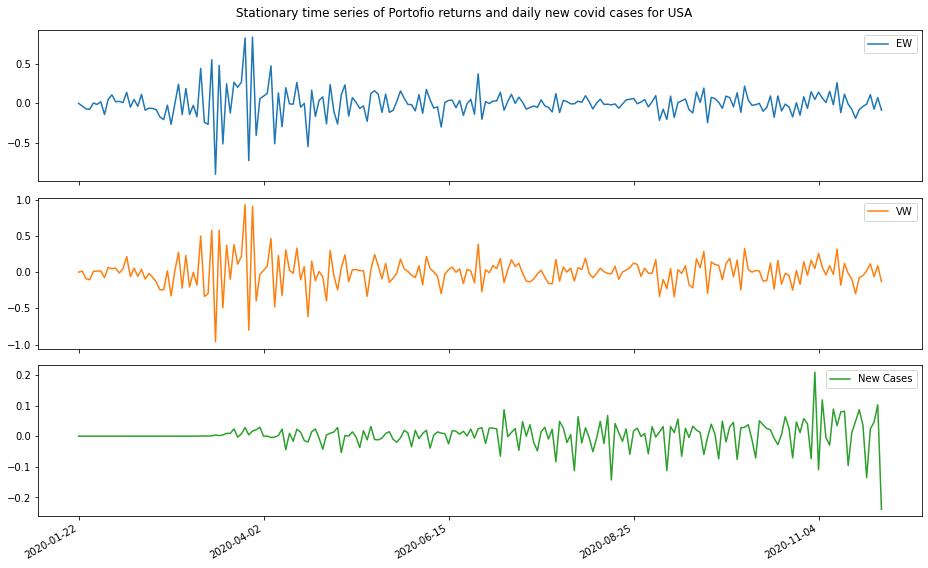


GRANGER CAUSALITY MATRIX: 



,EW_x,VW_x,New Cases_x
EW_y,0.0,0.0,0.384
VW_y,0.0,0.0,0.379
New Cases_y,0.402,0.522,0.0


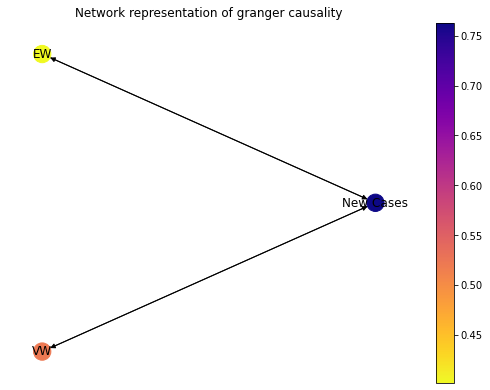

In [184]:
title_plot = 'Portofio returns and daily new covid cases for ' + country
granger_matrix = granger_causality(df_scaled, df_scaled.columns, title_plot, country + '_portolios_covid' + '_portolios_covid')

# China influence to other countries  <a class="anchor" id="chinax"></a>

In [165]:
df_china.head()

,new_confirmed
date,
2020-01-22,0.0
2020-01-23,95.0
2020-01-24,277.0
2020-01-25,486.0
2020-01-26,669.0


In [166]:
countries = ['Japan', 'USA', 'Switzerland']
df_port = pd.DataFrame(index=df_china.index)

for country in countries:
    df_port_country = pd.read_csv(f"datasets/{country}_portfolio.csv")
    df_port_country = df_port_country.set_index('Date')
    ew_name = 'EW_' + country
    vw_name = 'VW_' + country
    df_port_country = df_port_country.rename(columns={'EW':ew_name, 'VW':vw_name})
    df_port_country = df_port_country.rolling(10).mean()
    df_port_country = df_port_country.iloc[10:]
    df_port = df_port.merge(df_port_country, left_index=True, right_index=True)

In [167]:
df_total = df_port.merge(df_china, left_index=True, right_index=True)
df_total.head()

,EW_Japan,VW_Japan,EW_USA,VW_USA,EW_Switzerland,VW_Switzerland,new_confirmed
2020-01-22,0.020246,0.122228,0.317185,0.255486,0.037291,0.240428,0.0
2020-01-23,-0.010681,0.121740,0.256817,0.279181,-0.018581,0.142086,95.0
2020-01-24,-0.079666,0.024194,0.131844,0.148323,0.025247,0.191868,277.0
2020-01-27,-0.117997,0.002425,-0.001440,-0.003448,-0.136672,0.067792,802.0
2020-01-28,-0.080411,0.031774,0.007322,0.014169,-0.042203,0.135880,2632.0


In [168]:
# scale data:
df_scaled = scale_data(df_total, df_total.columns, False)
df_scaled = df_scaled.fillna(0)
df_scaled = df_scaled.rename(columns={'new_confirmed': 'New Cases'})
df_scaled.head()

,EW_Japan,VW_Japan,EW_USA,VW_USA,EW_Switzerland,VW_Switzerland,New Cases
2020-01-22,0.018342,0.110314,0.176561,0.174814,0.014769,0.174879,0.000000
2020-01-23,-0.009676,0.109875,0.142957,0.191027,-0.007359,0.103348,0.006276
2020-01-24,-0.072174,0.021836,0.073391,0.101489,0.009999,0.139558,0.018301
2020-01-27,-0.106900,0.002188,-0.000802,-0.002359,-0.054127,0.049309,0.052986
2020-01-28,-0.072849,0.028677,0.004076,0.009695,-0.016714,0.098834,0.173890


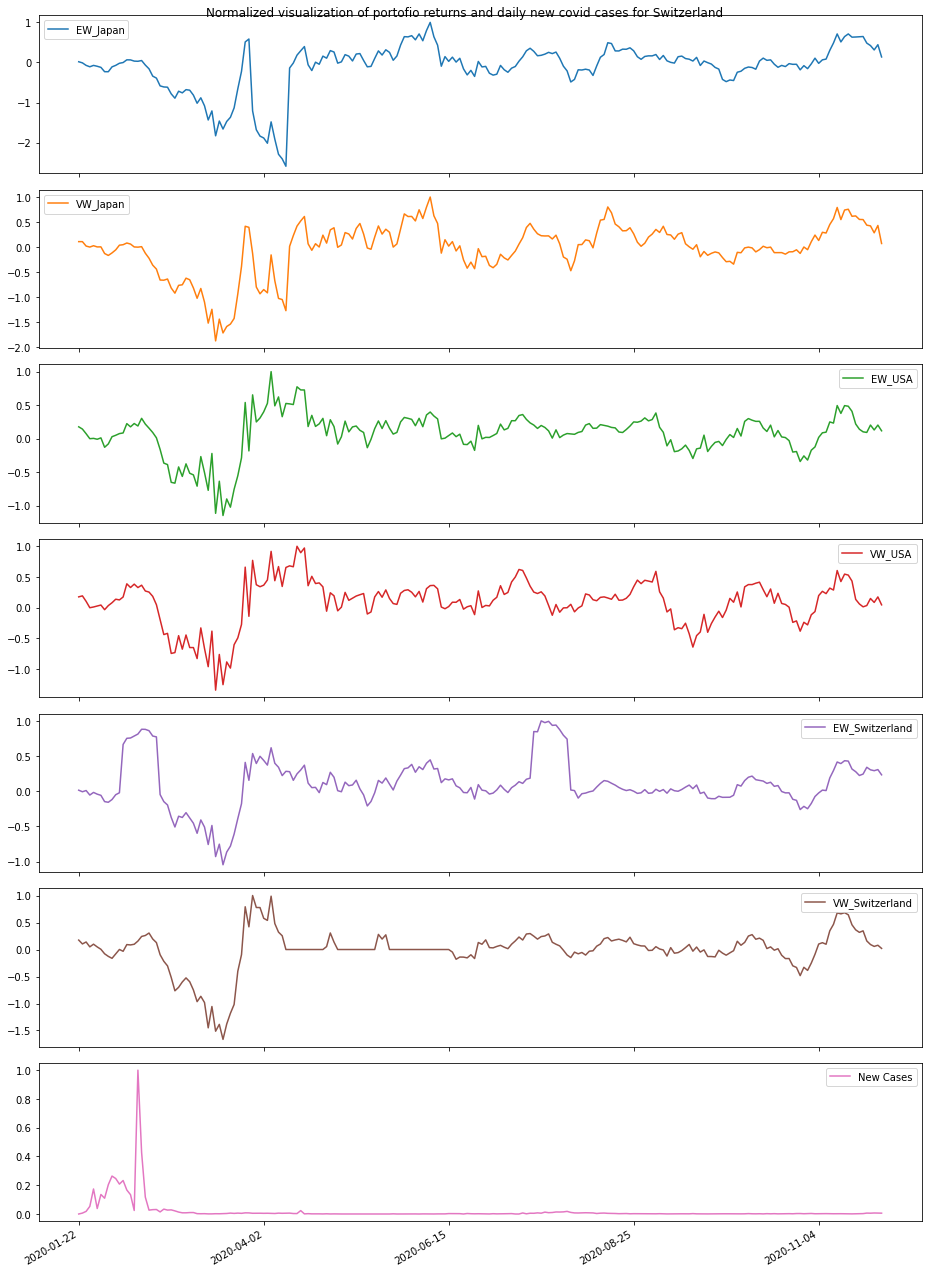

In [169]:
title_plot = 'Normalized visualization of portofio returns and daily new covid cases for ' + country
plot_time_series(df_scaled, title_plot, country + '_portolios_covid')

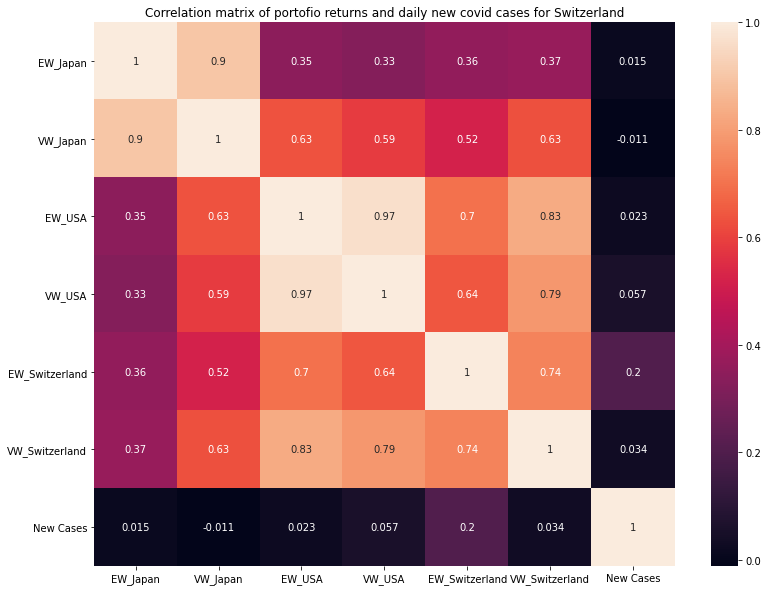

In [170]:
title_plot = 'Correlation matrix of portofio returns and daily new covid cases for ' + country
plot_correlation_matrix(df_scaled, df_scaled.columns, title_plot, country + '_portolios_covid')

STATIONARY TEST: 

 Dickey-Fuller Stationary Test for "EW_Japan" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -1.6694
 No. Lags Chosen      = 10
 Critical value 1%     = -3.462
 Critical value 5%     = -2.876
 Critical value 10%    = -2.574
 => P-Value = 0.447. Weak evidence to reject H0.
 => Series in Non-Stationary


 Dickey-Fuller Stationary Test for "VW_Japan" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -2.1118
 No. Lags Chosen      = 15
 Critical value 1%     = -3.463
 Critical value 5%     = -2.876
 Critical value 10%    = -2.574
 => P-Value = 0.2398. Weak evidence to reject H0.
 => Series in Non-Stationary


 Dickey-Fuller Stationary Test for "EW_USA" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test St

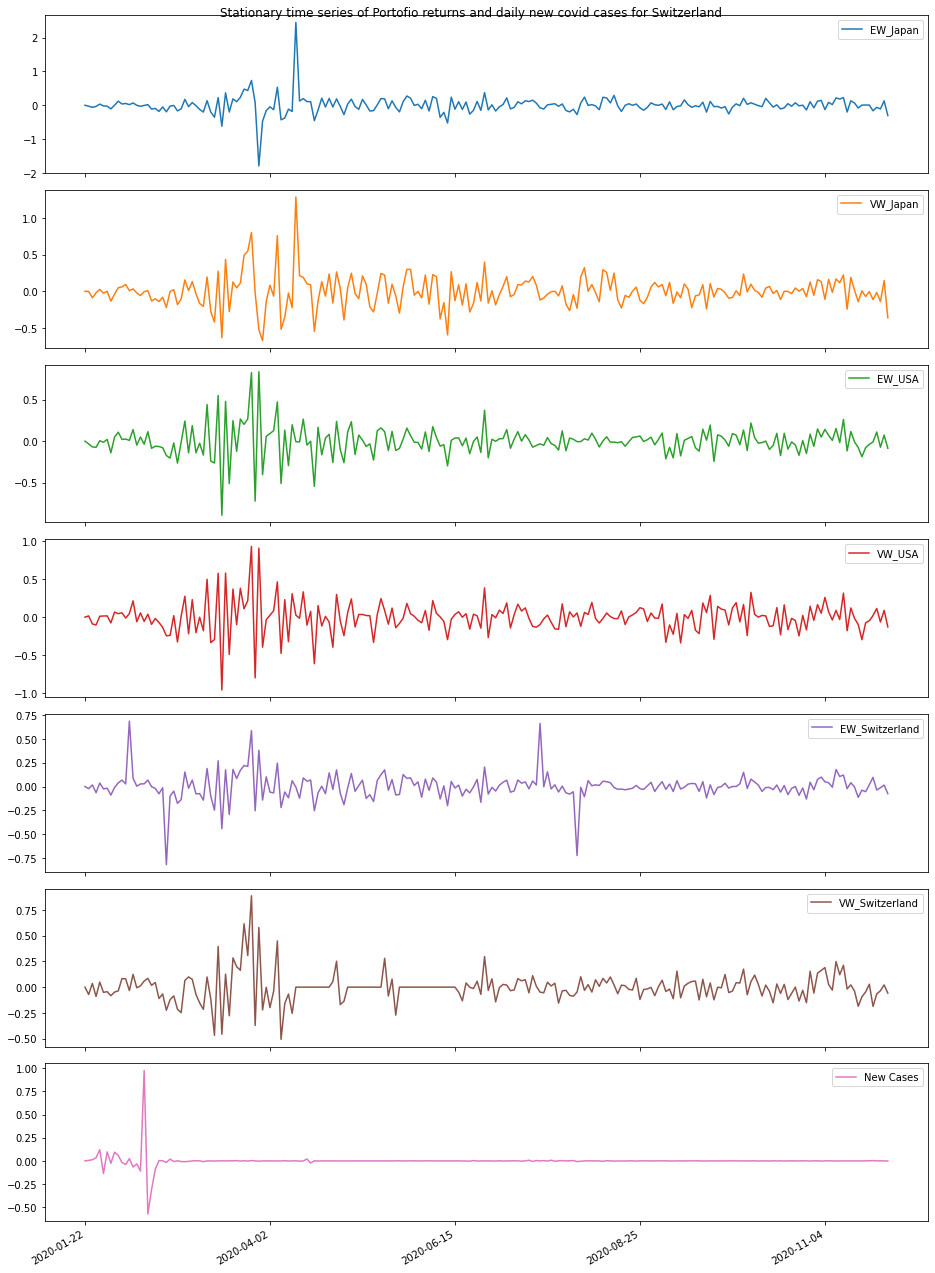


GRANGER CAUSALITY MATRIX: 



,EW_Japan_x,VW_Japan_x,EW_USA_x,VW_USA_x,EW_Switzerland_x,VW_Switzerland_x,New Cases_x
EW_Japan_y,0.0,0.0,0.0,0.0,0.0,0.0,0.657
VW_Japan_y,0.0,0.0,0.0,0.0,0.0,0.0,0.607
EW_USA_y,0.0,0.0,0.0,0.0,0.153,0.0,0.306
VW_USA_y,0.0,0.0,0.0,0.0,0.0,0.0,0.372
EW_Switzerland_y,0.0,0.104,0.0,0.0,0.0,0.0,0.0
VW_Switzerland_y,0.0,0.0,0.0,0.0,0.503,0.0,0.285
New Cases_y,0.9,0.827,0.839,0.837,0.0,0.619,0.0


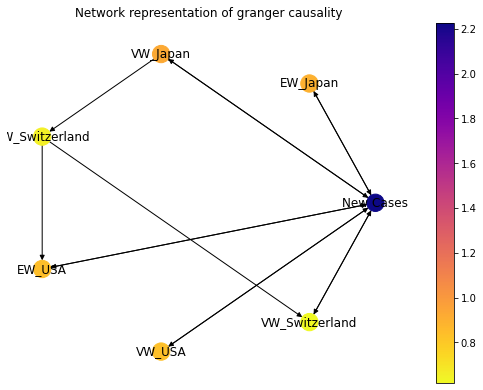

In [171]:
title_plot = 'Portofio returns and daily new covid cases for ' + country
granger_matrix = granger_causality(df_scaled, df_scaled.columns, title_plot, country + '_portolios_covid')